# 모듈 가져오기 (IMPORT 단계)

In [31]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro
from sklearn.decomposition import PCA
import statsmodels.api as sm
#ARIMA
from statsmodels.tsa.arima_model import ARIMA



#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split

#데이터 scaling => 거리기반 알고리즘은 필수!!!
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeClassifier
#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

In [4]:
#결과 창 확대
pd.set_option('display.max_rows', 100000000000) # 최대 줄 수 설정
pd.set_option('display.max_columns', 100000000000) # 최대 열 수 설정 
pd.set_option('display.width', 1000) # 표시할 가로의 길이

## 데이터 받아오기

In [5]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/home/pirl/Documents/MFG_MACHINE_NULL_COL_OUT.csv", engine="python", encoding = "euc-kr")
MFG_MACHINE.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [6]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/home/pirl/Documents/MFG_PROCESS_NULL_COL_OUT.csv", engine="python", encoding = "euc-kr")
MFG_PROCESS.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0,23.660,60.253,61.796,60.542,23.496,30.753,34.305,2.030,2.052,567,583,599,572,538,519,569,570,552,534,2017,2200,3168,3639.0,3283,3148,3215,48.0,136.0,110.5,167.8,86.6,70.9,28.3,126.0,157.30,47.2,139.2,111.0,189.4,55.9,28.2,32.4,82.8,84.0,443,419,392,372,4115.0,3973.0,4432,2506.0
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,44.6,101.6,88.7,114.3,216.9,155.9,59.0,93.9,96.0,46.0,139.0,77.9,101.0,398.8,339.8,45.6,93.0,93.0,23.340,61.528,60.228,63.139,23.420,30.800,35.300,2.032,2.010,569,584,600,574,541,520,573,575,558,536,2166,2132,2290,3331.0,3971,3030,2960,47.5,136.0,111.9,167.2,84.5,71.8,26.7,131.0,155.70,46.5,138.8,106.0,186.3,59.8,28.1,32.9,80.3,81.8,445,423,395,374,3642.0,4097.0,4499,2573.0
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,45.0,114.3,90.3,115.0,217.4,140.6,58.7,94.0,95.7,45.0,138.0,77.0,102.0,358.0,347.0,43.6,93.0,94.0,23.600,61.415,63.796,63.500,23.139,30.694,33.015,2.033,2.061,573,584,600,575,536,519,568,570,553,535,1984,2178,3194,3484.0,3324,3182,3123,47.3,136.0,110.6,168.5,85.4,73.6,27.5,131.0,156.30,46.9,139.0,108.4,187.9,48.5,30.3,29.4,81.2,82.2,444,421,393,372,4063.0,3972.0,4460,2502.0
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,44.0,115.0,88.6,115.4,242.5,152.4,58.8,94.0,97.0,46.1,138.0,77.8,101.1,356.4,438.1,45.1,93.0,93.0,23.424,61.446,60.800,64.220,23.376,30.691,32.760,2.030,2.062,561,578,594,574,539,519,569,571,551,533,2024,2220,3230,3574.0,3306,3338,3168,45.8,135.8,107.8,166.5,87.9,74.5,26.5,118.0,150.34,46.2,140.2,112.6,190.7,55.1,32.1,34.7,83.0,84.0,444,420,393,372,4131.0,4011.0,4466,2522.0
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04

In [7]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/home/pirl/Documents/MFG_TAT_NULL_COL_OUT.csv", engine="python", encoding = "euc-kr")
MFG_TAT.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,10074
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,10075
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,78,220,78,69,148,368,6747,6597,530,80,420,92,396,86,6840,10645
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,86,210,84,69,178,416,7137,6420,530,78,429,78,399,90,6720,10076
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,86,210,84,69,132,380,7527,6453,540,76,363,82,393,84,7110,10074


## MACHINE

In [10]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_MACHINE.drop(["JUDGE","PANEL_ID","LOT_ID","TIME_1BLACK","TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df_raw_y = MFG_MACHINE["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [14]:
df_x_dummy.corr().round(3)

,MC_1BLACK_1PRINT_1호기,MC_1BLACK_1PRINT_2호기,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_1PRINT_1호기,MC_2AG_1PRINT_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,MC_3BUS_1DEVELOP_1호기,MC_3BUS_1DEVELOP_2호기,MC_3BUS_2FIRE_1호기,MC_3BUS_2FIRE_2호기,MC_4DIELEC_1FIRE_1호기,MC_4DIELEC_1FIRE_2호기,MC_4DIELEC_1FIRE_3호기,MC_5MGO_1호기,MC_5MGO_2호기,MC_6PHOS_1R_1DISPENSER_1호기,MC_6PHOS_1R_1DISPENSER_2호기,MC_6PHOS_1R_2DRY_1호기,MC_6PHOS_1R_2DRY_2호기,MC_6PHOS_2G_1DISPENSER_1호기,MC_6PHOS_2G_1DISPENSER_2호기,MC_6PHOS_2G_2DRY_1호기,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_3B_1DISPENSER_1호기,MC_6PHOS_3B_1DISPENSER_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기,MC_7PASTE_1호기,MC_7PASTE_2호기,MC_8AGING_1호기,MC_8AGING_2호기
MC_1BLACK_1PRINT_1호기,1.000,-1.000,-0.016,0.016,-0.011,0.011,0.084,-0.084,-0.012,0.012,0.121,-0.121,-0.119,0.119,0.040,-0.120,0.079,-0.081,0.081,-0.191,0.191,-0.105,0.105,-0.003,0.003,-0.062,0.062,-0.015,0.015,-0.073,0.097,-0.028,0.114,-0.114,0.052,-0.052
MC_1BLACK_1PRINT_2호기,-1.000,1.000,0.016,-0.016,0.011,-0.011,-0.084,0.084,0.012,-0.012,-0.121,0.121,0.119,-0.119,-0.040,0.120,-0.079,0.081,-0.081,0.191,-0.191,0.105,-0.105,0.003,-0.003,0.062,-0.062,0.015,-0.015,0.073,-0.097,0.028,-0.114,0.114,-0.052,0.052
MC_1BLACK_2RTD_1호기,-0.016,0.016,1.000,-1.000,0.040,-0.040,-0.070,0.070,-0.120,0.120,0.054,-0.054,-0.047,0.047,0.053,-0.042,-0.012,0.013,-0.013,-0.000,0.000,0.108,-0.108,-0.017,0.017,0.109,-0.109,-0.084,0.084,0.030,0.068,-0.096,-0.040,0.040,0.001,-0.001
MC_1BLACK_2RTD_2호기,0.016,-0.016,-1.000,1.000,-0.040,0.040,0.070,-0.070,0.120,-0.120,-0.054,0.054,0.047,-0.047,-0.053,0.042,0.012,-0.013,0.013,0.000,-0.000,-0.108,0.108,0.017,-0.017,-0.109,0.109,0.084,-0.084,-0.030,-0.068,0.096,0.040,-0.040,-0.001,0.001
MC_2AG_1PRINT_1호기,-0.011,0.011,0.040,-0.040,1.000,-1.000,-0.021,0.021,-0.039,0.039,0.052,-0.052,-0.002,0.002,-0.061,0.037,0.025,-0.029,0.029,-0.092,0.092,-0.020,0.020,-0.091,0.091,0.060,-0.060,0.099,-0.099,-0.007,-0.059,0.065,0.089,-0.089,0.029,-0.029
MC_2AG_1PRINT_2호기,0.011,-0.011,-0.040,0.040,-1.000,1.000,0.021,-0.021,0.039,-0.039,-0.052,0.052,0.002,-0.002,0.061,-0.037,-0.025,0.029,-0.029,0.092,-0.092,0.020,-0.020,0.091,-0.091,-0.060,0.060,-0.099,0.099,0.007,0.059,-0.065,-0.089,0.089,-0.029,0.029
MC_2AG_2RTD_1호기,0.084,-0.084,-0.070,0.070,-0.021,0.021,1.000,-1.000,-0.020,0.020,0.114,-0.114,-0.049,0.049,-0.054,0.004,0.049,-0.128,0.128,-0.063,0.063,-0.033,0.033,-0.017,0.017,-0.034,0.034,-0.004,0.004,-0.213,0.069,0.133,0.063,-0.063,-0.000,0.000
MC_2AG_2RTD_2호기,-0.084,0.084,0.070,-0.070,0.021,-0.021,-1.000,1.000,0.020,-0.020,-0.114,0.114,0.049,-0.049,0.054,-0.004,-0.049,0.128,-0.128,0.063,-0.063,0.033,-0.033,0.017,-0.017,0.034,-0.034,0.004,-0.004,0.213,-0.069,-0.133,-0.063,0.063,0.000,-0.000
MC_2AG_3EXPOSURE_1호기,-0.012,0.012,-0.120,0.120,-0.039,0.039,-0.020,0.020,1.000,-1.000,0.107,-0.107,0.159,-0.159,-0.017,-0.030,0.046,-0.012,0.012,0.028,-0.028,-0.120,0.120,0.031,-0.031,-0.102,0.102,0.019,-0.019,-0.028,0.066,-0.039,-0.011,0.011,0.028,-0.028
MC_2AG_3EXPOSURE_2호기,0.012,-0.012,0.120,-0.120,0.039,-0.039,0.020,-0.020,-1.000,1.000,-0.107,0.107,-0.159,0.159,0.017,0.030,-0.046,0.012,-0.012,-0.028,0.028,0.120,-0.120,-0.031,0.031,0.102,-0.102,-0.019,0.019,0.028,-0.066,0.039,0.011,-0.011,-0.028,0.028


In [15]:
df_x_dummy.describe().round(3)

,MC_1BLACK_1PRINT_1호기,MC_1BLACK_1PRINT_2호기,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_1PRINT_1호기,MC_2AG_1PRINT_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,MC_3BUS_1DEVELOP_1호기,MC_3BUS_1DEVELOP_2호기,MC_3BUS_2FIRE_1호기,MC_3BUS_2FIRE_2호기,MC_4DIELEC_1FIRE_1호기,MC_4DIELEC_1FIRE_2호기,MC_4DIELEC_1FIRE_3호기,MC_5MGO_1호기,MC_5MGO_2호기,MC_6PHOS_1R_1DISPENSER_1호기,MC_6PHOS_1R_1DISPENSER_2호기,MC_6PHOS_1R_2DRY_1호기,MC_6PHOS_1R_2DRY_2호기,MC_6PHOS_2G_1DISPENSER_1호기,MC_6PHOS_2G_1DISPENSER_2호기,MC_6PHOS_2G_2DRY_1호기,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_3B_1DISPENSER_1호기,MC_6PHOS_3B_1DISPENSER_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기,MC_7PASTE_1호기,MC_7PASTE_2호기,MC_8AGING_1호기,MC_8AGING_2호기
count,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.00,3982.00,3982.000,3982.000,3982.000,3982.000,3982.000,3982.00,3982.00,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000
mean,0.540,0.460,0.544,0.456,0.505,0.495,0.545,0.455,0.505,0.495,0.49,0.51,0.545,0.455,0.335,0.320,0.345,0.49,0.51,0.561,0.439,0.464,0.536,0.530,0.470,0.565,0.435,0.526,0.474,0.291,0.355,0.355,0.549,0.451,0.550,0.450
std,0.498,0.498,0.498,0.498,0.500,0.500,0.498,0.498,0.500,0.500,0.50,0.50,0.498,0.498,0.472,0.467,0.475,0.50,0.50,0.496,0.496,0.499,0.499,0.499,0.499,0.496,0.496,0.499,0.499,0.454,0.478,0.479,0.498,0.498,0.498,0.498
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.00,1.00,1.000,0.000,0.000,0.000,0.000,0.00,1.00,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
75%,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [16]:
x_cols = df_x_dummy.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x_dummy)
print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape Data:\n{}".format(nd_scaled.shape))

Scaled Data:
[[-1.083  1.083 -1.093  1.093  0.991 -0.991  0.914 -0.914 -1.011  1.011
   1.02  -1.02   0.913 -0.913 -0.71  -0.686  1.378  1.02  -1.02   0.885
  -0.885 -0.931  0.931 -1.061  1.061 -1.139  1.139  0.95  -0.95  -0.64
  -0.741  1.348  0.906 -0.906 -1.105  1.105]
 [-1.083  1.083 -1.093  1.093  0.991 -0.991  0.914 -0.914 -1.011  1.011
   1.02  -1.02   0.913 -0.913 -0.71  -0.686  1.378  1.02  -1.02   0.885
  -0.885 -0.931  0.931 -1.061  1.061 -1.139  1.139  0.95  -0.95  -0.64
  -0.741  1.348  0.906 -0.906 -1.105  1.105]
 [-1.083  1.083 -1.093  1.093  0.991 -0.991  0.914 -0.914 -1.011  1.011
   1.02  -1.02   0.913 -0.913 -0.71  -0.686  1.378  1.02  -1.02   0.885
  -0.885 -0.931  0.931 -1.061  1.061 -1.139  1.139  0.95  -0.95  -0.64
  -0.741  1.348  0.906 -0.906 -1.105  1.105]
 [-1.083  1.083 -1.093  1.093  0.991 -0.991  0.914 -0.914 -1.011  1.011
   1.02  -1.02   0.913 -0.913 -0.71  -0.686  1.378  1.02  -1.02   0.885
  -0.885 -0.931  0.931 -1.061  1.061 -1.139  1.139  0.95  -0.95

In [17]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,MC_1BLACK_1PRINT_1호기,MC_1BLACK_1PRINT_2호기,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_1PRINT_1호기,MC_2AG_1PRINT_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,MC_3BUS_1DEVELOP_1호기,MC_3BUS_1DEVELOP_2호기,MC_3BUS_2FIRE_1호기,MC_3BUS_2FIRE_2호기,MC_4DIELEC_1FIRE_1호기,MC_4DIELEC_1FIRE_2호기,MC_4DIELEC_1FIRE_3호기,MC_5MGO_1호기,MC_5MGO_2호기,MC_6PHOS_1R_1DISPENSER_1호기,MC_6PHOS_1R_1DISPENSER_2호기,MC_6PHOS_1R_2DRY_1호기,MC_6PHOS_1R_2DRY_2호기,MC_6PHOS_2G_1DISPENSER_1호기,MC_6PHOS_2G_1DISPENSER_2호기,MC_6PHOS_2G_2DRY_1호기,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_3B_1DISPENSER_1호기,MC_6PHOS_3B_1DISPENSER_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기,MC_7PASTE_1호기,MC_7PASTE_2호기,MC_8AGING_1호기,MC_8AGING_2호기
0,-1.083,1.083,-1.093,1.093,0.991,-0.991,0.914,-0.914,-1.011,1.011,1.02,-1.02,0.913,-0.913,-0.71,-0.686,1.378,1.02,-1.02,0.885,-0.885,-0.931,0.931,-1.061,1.061,-1.139,1.139,0.95,-0.95,-0.64,-0.741,1.348,0.906,-0.906,-1.105,1.105
1,-1.083,1.083,-1.093,1.093,0.991,-0.991,0.914,-0.914,-1.011,1.011,1.02,-1.02,0.913,-0.913,-0.71,-0.686,1.378,1.02,-1.02,0.885,-0.885,-0.931,0.931,-1.061,1.061,-1.139,1.139,0.95,-0.95,-0.64,-0.741,1.348,0.906,-0.906,-1.105,1.105
2,-1.083,1.083,-1.093,1.093,0.991,-0.991,0.914,-0.914,-1.011,1.011,1.02,-1.02,0.913,-0.913,-0.71,-0.686,1.378,1.02,-1.02,0.885,-0.885,-0.931,0.931,-1.061,1.061,-1.139,1.139,0.95,-0.95,-0.64,-0.741,1.348,0.906,-0.906,-1.105,1.105
3,-1.083,1.083,-1.093,1.093,0.991,-0.991,0.914,-0.914,-1.011,1.011,1.02,-1.02,0.913,-0.913,-0.71,-0.686,1.378,1.02,-1.02,0.885,-0.885,-0.931,0.931,-1.061,1.061,-1.139,1.139,0.95,-0.95,-0.64,-0.741,1.348,0.906,-0.906,-1.105,1.105
4,-1.083,1.083,-1.093,1.093,0.991,-0.991,0.914,-0.914,-1.011,1.011,1.02,-1.02,0.913,-0.913,-0.71,-0.686,1.378,1.02,-1.02,0.885,-0.885,-0.931,0.931,-1.061,1.061,-1.139,1.139,0.95,-0.95,-0.64,-0.741,1.348,0.906,-0.906,-1.105,1.105


In [18]:
df_scaled.describe().round(3)

,MC_1BLACK_1PRINT_1호기,MC_1BLACK_1PRINT_2호기,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_1PRINT_1호기,MC_2AG_1PRINT_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,MC_3BUS_1DEVELOP_1호기,MC_3BUS_1DEVELOP_2호기,MC_3BUS_2FIRE_1호기,MC_3BUS_2FIRE_2호기,MC_4DIELEC_1FIRE_1호기,MC_4DIELEC_1FIRE_2호기,MC_4DIELEC_1FIRE_3호기,MC_5MGO_1호기,MC_5MGO_2호기,MC_6PHOS_1R_1DISPENSER_1호기,MC_6PHOS_1R_1DISPENSER_2호기,MC_6PHOS_1R_2DRY_1호기,MC_6PHOS_1R_2DRY_2호기,MC_6PHOS_2G_1DISPENSER_1호기,MC_6PHOS_2G_1DISPENSER_2호기,MC_6PHOS_2G_2DRY_1호기,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_3B_1DISPENSER_1호기,MC_6PHOS_3B_1DISPENSER_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기,MC_7PASTE_1호기,MC_7PASTE_2호기,MC_8AGING_1호기,MC_8AGING_2호기
count,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.00,3982.00,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000
mean,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.00,-0.00,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.083,-0.924,-1.093,-0.915,-1.010,-0.991,-1.094,-0.914,-1.011,-0.990,-0.981,-1.020,-1.095,-0.913,-0.710,-0.686,-0.726,-0.98,-1.02,-1.129,-0.885,-0.931,-1.075,-1.061,-0.942,-1.139,-0.878,-1.053,-0.950,-0.640,-0.741,-0.742,-1.104,-0.906,-1.105,-0.905
25%,-1.083,-0.924,-1.093,-0.915,-1.010,-0.991,-1.094,-0.914,-1.011,-0.990,-0.981,-1.020,-1.095,-0.913,-0.710,-0.686,-0.726,-0.98,-1.02,-1.129,-0.885,-0.931,-1.075,-1.061,-0.942,-1.139,-0.878,-1.053,-0.950,-0.640,-0.741,-0.742,-1.104,-0.906,-1.105,-0.905
50%,0.924,-0.924,0.915,-0.915,0.991,-0.991,0.914,-0.914,0.990,-0.990,-0.981,0.981,0.913,-0.913,-0.710,-0.686,-0.726,-0.98,0.98,0.885,-0.885,-0.931,0.931,0.942,-0.942,0.878,-0.878,0.950,-0.950,-0.640,-0.741,-0.742,0.906,-0.906,0.905,-0.905
75%,0.924,1.083,0.915,1.093,0.991,1.010,0.914,1.094,0.990,1.011,1.020,0.981,0.913,1.095,1.409,1.458,1.378,1.02,0.98,0.885,1.129,1.075,0.931,0.942,1.061,0.878,1.139,0.950,1.053,1.563,1.349,1.348,0.906,1.104,0.905,1.105
max,0.924,1.083,0.915,1.093,0.991,1.010,0.914,1.094,0.990,1.011,1.020,0.981,0.913,1.095,1.409,1.458,1.378,1.02,0.98,0.885,1.129,1.075,0.931,0.942,1.061,0.878,1.139,0.950,1.053,1.563,1.349,1.348,0.906,1.104,0.905,1.105


In [21]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data:\n {}".format(nd_pca[:5]))
print("Shape:\n {}".format(nd_pca.shape))

PCA Data:
 [[ 0.27851835 -2.78201258 -0.03043484  0.77323635  2.29489627  1.9145415 ]
 [ 0.27851835 -2.78201258 -0.03043484  0.77323635  2.29489627  1.9145415 ]
 [ 0.27851835 -2.78201258 -0.03043484  0.77323635  2.29489627  1.9145415 ]
 [ 0.27851835 -2.78201258 -0.03043484  0.77323635  2.29489627  1.9145415 ]
 [ 0.27851835 -2.78201258 -0.03043484  0.77323635  2.29489627  1.9145415 ]]
Shape:
 (3982, 6)


In [22]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6",])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,MC_1BLACK_1PRINT_1호기,MC_1BLACK_1PRINT_2호기,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_1PRINT_1호기,MC_2AG_1PRINT_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,MC_3BUS_1DEVELOP_1호기,MC_3BUS_1DEVELOP_2호기,MC_3BUS_2FIRE_1호기,MC_3BUS_2FIRE_2호기,MC_4DIELEC_1FIRE_1호기,MC_4DIELEC_1FIRE_2호기,MC_4DIELEC_1FIRE_3호기,MC_5MGO_1호기,MC_5MGO_2호기,MC_6PHOS_1R_1DISPENSER_1호기,MC_6PHOS_1R_1DISPENSER_2호기,MC_6PHOS_1R_2DRY_1호기,MC_6PHOS_1R_2DRY_2호기,MC_6PHOS_2G_1DISPENSER_1호기,MC_6PHOS_2G_1DISPENSER_2호기,MC_6PHOS_2G_2DRY_1호기,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_3B_1DISPENSER_1호기,MC_6PHOS_3B_1DISPENSER_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기,MC_7PASTE_1호기,MC_7PASTE_2호기,MC_8AGING_1호기,MC_8AGING_2호기,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.082772,1.082772,-1.093229,1.093229,0.990502,-0.990502,0.914259,-0.914259,-1.010604,1.010604,1.019784,-1.019784,0.913333,-0.913333,-0.709772,-0.685899,1.377718,1.020296,-1.020296,0.885466,-0.885466,-0.93058,0.93058,-1.061132,1.061132,-1.139188,1.139188,0.950017,-0.950017,-0.639967,-0.741226,1.348376,0.905958,-0.905958,-1.104925,1.104925,0.278518,-2.782013,-0.030435,0.773236,2.294896,1.914542
1,-1.082772,1.082772,-1.093229,1.093229,0.990502,-0.990502,0.914259,-0.914259,-1.010604,1.010604,1.019784,-1.019784,0.913333,-0.913333,-0.709772,-0.685899,1.377718,1.020296,-1.020296,0.885466,-0.885466,-0.93058,0.93058,-1.061132,1.061132,-1.139188,1.139188,0.950017,-0.950017,-0.639967,-0.741226,1.348376,0.905958,-0.905958,-1.104925,1.104925,0.278518,-2.782013,-0.030435,0.773236,2.294896,1.914542
2,-1.082772,1.082772,-1.093229,1.093229,0.990502,-0.990502,0.914259,-0.914259,-1.010604,1.010604,1.019784,-1.019784,0.913333,-0.913333,-0.709772,-0.685899,1.377718,1.020296,-1.020296,0.885466,-0.885466,-0.93058,0.93058,-1.061132,1.061132,-1.139188,1.139188,0.950017,-0.950017,-0.639967,-0.741226,1.348376,0.905958,-0.905958,-1.104925,1.104925,0.278518,-2.782013,-0.030435,0.773236,2.294896,1.914542
3,-1.082772,1.082772,-1.093229,1.093229,0.990502,-0.990502,0.914259,-0.914259,-1.010604,1.010604,1.019784,-1.019784,0.913333,-0.913333,-0.709772,-0.685899,1.377718,1.020296,-1.020296,0.885466,-0.885466,-0.93058,0.93058,-1.061132,1.061132,-1.139188,1.139188,0.950017,-0.950017,-0.639967,-0.741226,1.348376,0.905958,-0.905958,-1.104925,1.104925,0.278518,-2.782013,-0.030435,0.773236,2.294896,1.914542
4,-1.082772,1.082772,-1.093229,1.093229,0.990502,-0.990502,0.914259,-0.914259,-1.010604,1.010604,1.019784,-1.019784,0.913333,-0.913333,-0.709772,-0.685899,1.377718,1.020296,-1.020296,0.885466,-0.885466,-0.93058,0.93058,-1.061132,1.061132,-1.139188,1.139188,0.950017,-0.950017,-0.639967,-0.741226,1.348376,0.905958,-0.905958,-1.104925,1.104925,0.278518,-2.782013,-0.030435,0.773236,2.294896,1.914542


In [23]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range (1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.989,0.083,0.083
1,2,2.916,0.081,0.164
2,3,2.724,0.076,0.240
3,4,2.529,0.070,0.310
4,5,2.287,0.063,0.373
5,6,2.271,0.063,0.436


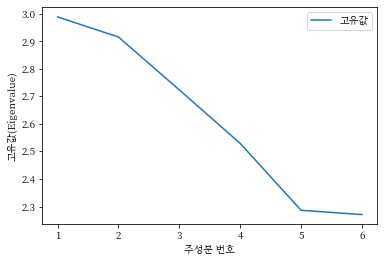

In [24]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"],label="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

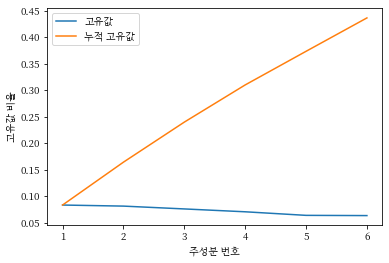

In [25]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"],label="고유값")

plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"],label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [27]:
x_cols = pd.DataFrame({"Feature":df_x_dummy.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                            columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,MC_1BLACK_1PRINT_1호기,0.367,0.055,0.081,0.019,0.048,0.235
1,MC_1BLACK_1PRINT_2호기,-0.367,-0.055,-0.081,-0.019,-0.048,-0.235
2,MC_1BLACK_2RTD_1호기,-0.081,-0.147,0.296,0.091,0.233,-0.023
3,MC_1BLACK_2RTD_2호기,0.081,0.147,-0.296,-0.091,-0.233,0.023
4,MC_2AG_1PRINT_1호기,0.041,0.167,0.212,0.056,0.032,-0.069
5,MC_2AG_1PRINT_2호기,-0.041,-0.167,-0.212,-0.056,-0.032,0.069
6,MC_2AG_2RTD_1호기,0.300,-0.001,0.003,0.005,-0.280,-0.188
7,MC_2AG_2RTD_2호기,-0.300,0.001,-0.003,-0.005,0.280,0.188
8,MC_2AG_3EXPOSURE_1호기,0.071,0.140,-0.336,-0.134,0.192,-0.142
9,MC_2AG_3EXPOSURE_2호기,-0.071,-0.140,0.336,0.134,-0.192,0.142


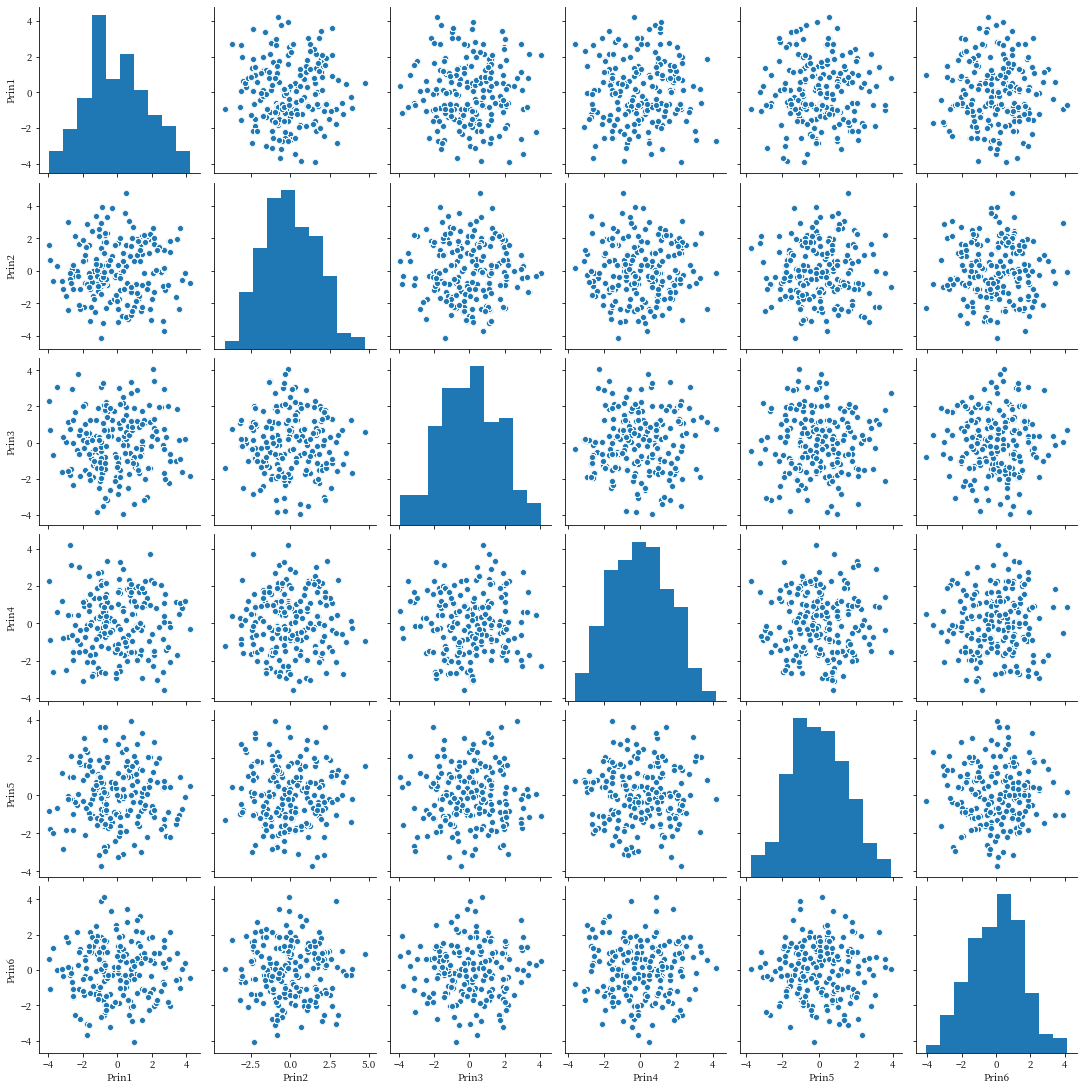

In [28]:
sns.pairplot(df_pca)

In [29]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,0.0,0.0,0.0
Prin3,0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,0.0,0.0,1.0,0.0,0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,0.0,0.0,1.0


In [34]:
df_raw_x_const = sm.add_constant(df_x_dummy)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.531
Date:                Sun, 23 Feb 2020   Prob (F-statistic):             0.0654
Time:                        19:52:27   Log-Likelihood:                -939.58
No. Observations:                3982   AIC:                             1919.
Df Residuals:                    3962   BIC:                             2045.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [35]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.529
Date:                Sun, 23 Feb 2020   Prob (F-statistic):             0.0659
Time:                        19:52:48   Log-Likelihood:                -939.60
No. Observations:                3982   AIC:                             1919.
Df Residuals:                    3962   BIC:                             2045.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [36]:
x_var = ["Prin1", "Prin2", "Prin3"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.623
Date:                Sun, 23 Feb 2020   Prob (F-statistic):             0.0490
Time:                        19:52:56   Log-Likelihood:                -950.21
No. Observations:                3982   AIC:                             1908.
Df Residuals:                    3978   BIC:                             1934.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1057      0.005     21.708      0.0

## PROCESS

In [39]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_PROCESS.drop(["JUDGE","PANEL_ID","LOT_ID","TIME_1BLACK","TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df_raw_y = MFG_PROCESS["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [41]:
df_x_dummy.corr().round(3)

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
BLACK_RTD_TEMP_GLASS_START,1.000,-0.000,0.562,0.508,0.015,-0.393,-0.128,0.348,0.246,0.613,0.427,-0.157,-0.022,0.030,-0.067,0.165,-0.664,-0.673,0.324,-0.077,-0.003,0.030,0.469,0.396,0.364,-0.023,0.098,-0.007,0.040,0.023,-0.022,-0.080,-0.015,0.023,0.044,0.012,-0.037,0.009,0.039,-0.070,0.039,0.015,0.038,0.015,-0.015,0.043,0.016,-0.123,-0.083,-0.104,-0.019,0.062,0.009,-0.017,-0.047,-0.046,-0.045,0.150,0.220,0.013,-0.051,-0.053,-0.011,-0.068,-0.045,-0.033,0.004,0.080,0.101,0.076
BLACK_RTD_TEMP_GLASS_END,-0.000,1.000,0.081,0.077,0.043,0.271,0.044,0.125,0.089,0.049,0.064,-0.001,-0.005,0.008,-0.006,0.014,-0.029,-0.031,0.024,0.018,0.013,0.102,-0.044,-0.009,-0.073,0.066,-0.009,-0.018,-0.021,-0.019,0.041,-0.014,-0.031,-0.000,-0.017,-0.033,-0.033,-0.014,0.042,0.019,-0.002,-0.022,0.011,0.006,0.057,0.080,0.051,0.073,0.085,0.025,-0.011,0.021,0.036,0.017,0.007,0.016,0.014,-0.083,-0.003,0.034,0.025,0.014,-0.013,0.031,0.018,0.004,0.005,-0.008,0.020,-0.017
BLACK_RTD_TEMP_WALL_START,0.562,0.081,1.000,0.676,0.028,-0.309,0.008,0.642,0.583,0.377,0.424,-0.022,0.047,0.030,-0.008,0.051,-0.406,-0.424,0.274,-0.057,0.043,0.066,0.241,0.335,0.221,-0.053,0.045,0.012,0.033,0.052,0.031,0.055,0.080,-0.035,-0.025,0.049,0.083,0.002,-0.007,-0.041,0.024,-0.021,0.015,-0.011,0.045,0.067,0.041,-0.033,-0.039,-0.065,0.047,0.070,0.006,-0.015,-0.050,-0.092,-0.086,0.063,0.100,0.023,-0.088,-0.097,0.066,0.046,0.064,0.045,0.004,0.022,0.007,0.048
BLACK_RTD_TEMP_WALL_MAX,0.508,0.077,0.676,1.000,-0.050,-0.186,0.091,0.524,0.457,0.378,0.336,-0.044,0.000,-0.014,-0.051,0.095,-0.427,-0.433,0.253,0.008,0.066,0.045,0.305,0.310,0.254,-0.014,0.050,-0.024,0.011,0.016,0.044,0.009,0.024,0.008,0.003,0.044,0.052,0.018,-0.013,-0.056,0.015,-0.001,0.018,-0.021,0.003,0.052,0.045,-0.029,0.001,-0.099,0.029,0.054,-0.024,-0.037,-0.040,-0.044,-0.049,0.120,0.094,0.058,-0.017,-0.022,0.022,-0.015,0.003,-0.031,0.004,0.035,0.043,0.039
BLACK_RTD_PRES_START,0.015,0.043,0.028,-0.050,1.000,-0.180,-0.117,0.093,0.057,0.054,-0.082,-0.111,-0.051,-0.002,0.189,0.050,-0.032,-0.034,-0.031,0.014,-0.009,0.006,-0.052,-0.197,-0.074,0.122,0.104,0.012,0.008,0.012,-0.027,-0.091,-0.105,-0.059,0.009,-0.009,-0.011,0.084,-0.019,-0.029,-0.016,0.058,0.043,-0.004,-0.016,-0.052,0.026,0.095,-0.028,0.061,-0.004,0.032,0.037,-0.033,-0.063,0.006,-0.002,-0.040,-0.049,-0.081,0

In [43]:
x_cols = df_x_dummy.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x_dummy)
print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape Data:\n{}".format(nd_scaled.shape))

Scaled Data:
[[ 0.164 -0.977 -0.106  0.009  1.214 -0.439  0.027 -0.18  -0.116  0.32
  -0.135 -1.544  0.234 -0.777  1.523 -1.228 -0.415 -0.194  0.828 -0.784
   0.019 -1.042  0.722 -0.636  0.134  0.415  0.574 -0.494  0.117  0.086
  -0.337 -0.769  0.425 -1.108 -1.477 -0.596 -0.033 -0.849  0.563  0.789
   1.666 -1.067  0.084  0.877  0.972  0.556  0.751  0.782  0.044 -1.058
   0.645 -0.143  0.848  0.233 -0.426  0.657  0.479  0.088 -0.612 -0.533
   0.662  0.813 -0.455 -0.707 -0.087  0.486  1.004 -1.247 -0.706 -0.995]
 [ 0.39  -1.101 -0.207 -0.655  0.737 -0.459  0.178  0.395 -0.116  0.32
   1.167  0.036 -0.773  1.501 -1.229  0.524 -0.027 -0.194 -1.187  0.674
  -1.114  0.622  0.207 -0.504  1.017  0.874 -0.499 -0.055  0.473  0.421
   0.54   0.32   0.846  0.509  0.814  1.111  0.772  1.121 -0.894 -1.129
  -0.535  1.375 -1.116 -0.801  0.369  0.556  1.192  0.304 -1.099 -0.609
  -0.568  0.081  0.359 -0.384 -0.858 -0.844 -0.664  1.516 -0.645 -0.247
  -1.166 -0.916  0.852  1.78   1.932  1.845 -1.008  

In [45]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,0.164,-0.977,-0.106,0.009,1.214,-0.439,0.027,-0.180,-0.116,0.320,-0.135,-1.544,0.234,-0.777,1.523,-1.228,-0.415,-0.194,0.828,-0.784,0.019,-1.042,0.722,-0.636,0.134,0.415,0.574,-0.494,0.117,0.086,-0.337,-0.769,0.425,-1.108,-1.477,-0.596,-0.033,-0.849,0.563,0.789,1.666,-1.067,0.084,0.877,0.972,0.556,0.751,0.782,0.044,-1.058,0.645,-0.143,0.848,0.233,-0.426,0.657,0.479,0.088,-0.612,-0.533,0.662,0.813,-0.455,-0.707,-0.087,0.486,1.004,-1.247,-0.706,-0.995
1,0.390,-1.101,-0.207,-0.655,0.737,-0.459,0.178,0.395,-0.116,0.320,1.167,0.036,-0.773,1.501,-1.229,0.524,-0.027,-0.194,-1.187,0.674,-1.114,0.622,0.207,-0.504,1.017,0.874,-0.499,-0.055,0.473,0.421,0.540,0.320,0.846,0.509,0.814,1.111,0.772,1.121,-0.894,-1.129,-0.535,1.375,-1.116,-0.801,0.369,0.556,1.192,0.304,-1.099,-0.609,-0.568,0.081,0.359,-0.384,-0.858,-0.844,-0.664,1.516,-0.645,-0.247,-1.166,-0.916,0.852,1.780,1.932,1.845,-1.008,0.909,0.657,0.492
2,0.691,1.148,1.402,0.275,0.756,-0.957,-0.275,0.478,-0.359,-0.605,-0.135,-0.712,0.234,0.307,-1.019,-0.291,-0.027,0.180,0.450,0.545,1.464,0.853,-1.694,-0.802,-1.011,1.103,0.804,0.823,0.473,0.421,0.979,-1.495,0.425,-1.512,-1.477,-0.312,0.369,-1.286,0.091,0.845,0.558,-0.921,0.429,0.271,0.127,0.556,0.783,1.339,-0.609,0.289,0.039,0.081,0.542,-0.031,-0.642,-0.124,-0.074,-2.623,0.085,-2.251,-0.508,-0.602,0.198,0.537,0.586,0.486,0.782,-1.264,-0.137,-1.084
3,-0.062,1.272,-0.307,0.806,1.705,-0.573,-0.124,0.478,0.693,0.413,-0.135,-0.047,-0.672,0.260,1.643,0.320,-0.027,-0.194,-0.658,0.580,-0.701,1.315,-0.090,-0.811,-1.237,0.415,0.830,-1.811,-1.667,-1.586,0.540,-0.406,0.425,-1.108,-1.019,-0.881,-0.436,-0.757,0.991,0.924,1.201,-0.985,2.016,0.567,-1.684,-0.078,-0.099,-0.253,0.752,0.738,-0.720,-0.502,-1.279,-0.648,0.654,1.137,0.958,-0.205,0.681,0.783,0.808,0.813,0.198,-0.085,0.586,0.486,1.072,-0.586,-0.015,-0.640
4,0.541,0.316,0.296,-0.390,0.790,-0.592,-2.388,0.478,-0.520,1.245,-0.135,-0.047,-0.370,-0.578,0.483,0.565,-0.415,-0.194,0.866,-0.776,-0.122,-1.032,-0.212,0.149,-0.255,0.874,0.779,-1.591,-1.667,-1.920,-0.337,-1.132,0.004,1.318,-0.561,0.542,-0.436,1.081,-0.980,-1.041,-0.978,1.123,-1.045,-0.873,0.731,0.556,0.846,1.021,-3.058,0.838,-0.037,-1.220,1.154,0.057,-0.426,-1.685,-1.548,0.051,-0.081,-0.305,-1.312,-0.759,-0.455,-0.085,-0.087,0.486,-1.050,0.492,0.311,0.737


In [46]:
df_scaled.describe().round(3)

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
count,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000
mean,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-4.584,-2.711,-7.546,-8.890,-3.095,-2.571,-6.161,-6.347,-5.454,-4.952,-13.160,-3.457,-5.904,-2.905,-3.391,-3.143,-1.967,-2.064,-5.280,-1.531,-1.496,-1.852,-3.988,-2.754,-3.420,-6.470,-6.762,-2.469,-3.094,-3.258,-3.407,-3.672,-4.626,-2.321,-2.393,-3.156,-3.253,-2.066,-3.530,-1.417,-2.663,-1.918,-3.211,-2.538,-11.828,-5.790,-7.152,-11.318,-4.637,-4.001,-4.436,-1.812,-6.182,-8.315,-4.961,-6.638,-5.935,-4.821,-5.153,-2.995,-3.432,-3.588,-6.990,-7.546,-7.492,-6.312,-1.216,-2.273,-1.947,-2.194
25%,-0.062,-0.707,-0.508,-0.522,-0.665,-0.654,-0.728,-0.345,-0.440,-0.605,-0.135,-0.712,-0.773,-0.659,-0.668,-0.535,-0.415,-0.531,-0.771,-0.778,-0.814,-0.823,-0.036,-0.526,-0.461,-0.503,-0.755,-0.713,-0.597,-0.582,-0.775,-0.406,0.004,-1.108,-0.561,-0.596,-0.436,-0.823,-0.509,-1.074,-0.

In [47]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data:\n {}".format(nd_pca[:5]))
print("Shape:\n {}".format(nd_pca.shape))

PCA Data:
 [[ 2.7159177  -0.30884476 -1.54101189 -0.26967702 -1.3796096  -0.70200377]
 [-2.98469874 -1.02352668  2.24671711 -3.28434096 -0.78255498 -0.08482196]
 [ 2.08336859  0.53519016  0.55604523 -1.20803673 -1.1424067  -1.61840445]
 [ 2.61023334  0.92393111 -0.80174839  1.40543529  1.88234122 -3.54298403]
 [-2.76957966 -0.6011639   2.01049406  1.0399858  -2.84189752 -1.55731449]]
Shape:
 (3982, 6)


In [48]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6",])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,0.163866,-0.976657,-0.105993,0.008872,1.213546,-0.439418,0.026798,-0.180313,-0.116064,0.320381,-0.135122,-1.543994,0.233567,-0.776552,1.522776,-1.227823,-0.415107,-0.194354,0.828076,-0.783914,0.018901,-1.041950,0.721771,-0.636108,0.133997,0.414868,0.574399,-0.494007,0.116553,0.086419,-0.336679,-0.768787,0.425047,-1.107991,-1.476777,-0.596138,-0.033152,-0.849324,0.562576,0.788525,1.665748,-1.066641,0.083664,0.876604,0.972469,0.556140,0.751041,0.782003,0.044108,-1.057912,0.645237,-0.143141,0.848134,0.233185,-0.425839,0.656608,0.478757,0.087702,-0.611534,-0.533485,0.662077,0.812545,-0.455266,-0.706859,-0.087232,0.485646,1.003614,-1.246940,-0.706215,-0.995076,2.715918,-0.308845,-1.541012,-0.269677,-1.379610,-0.702004
1,0.389962,-1.100574,-0.206533,-0.655228,0.737321,-0.458941,0.177730,0.395277,-0.116064,0.320381,1.167357,0.036238,-0.772558,1.500816,-1.228916,0.524152,-0.027153,-0.194354,-1.187025,0.674124,-1.114349,0.622070,0.207492,-0.503897,1.016845,0.873886,-0.499179,-0.055159,0.473290,0.420841,0.540427,0.320001,0.845972,0.509022,0.813682,1.110624,0.771788,1.120881,-0.894381,-1.128824,-0.534592,1.374698,-1.116396,-0.800952,0.368675,0.556140,1.191873,0.304381,-1.098881,-0.608956,-0.568180,0.081182,0.359113,-0.383728,-0.857779,-0.844344,-0.663866,1.516416,-0.644684,-0.247287,-1.165652,-0.916060,0.851778,1.780185,1.932288,1.845113,-1.007941,0.909009,0.656831,0.492430,-2.984699,-1.023527,2.246717,-3.284341,-0.782555,-0.084822
2,0.691424,1.147621,1.402099,0.274512,0.756219,-0.956796,-0.275066,0.477504,-0.358714,-0.604616,-0.135122,-0.712293,0.233567,0.306515,-1.018595,-0.290720,-0.027153,0.179537,0.450244,0.544902,1.464373,0.853379,-1.693991,-0.802074,-1.010600,1.103394,0.804452,0.822536,0.473290,0.420841,0.978980,-1.494646,0.425047,-1.512245,-1.476777,-0.311678,0.369318,-1.285678,0.091208,0.845303,0.558434,-0.921155,0.429444,0.271369,0.127158,0.556140,0.782529,1.339229,-0.609028,0.288957,0.038529,0.081182,0.542496,-0.031206,-0.641809,-0.123887,-0.074125,-2.623191,0.084610,-2.250678,-0.507670,-0.601768,0.198256,0.536663,0.585942,0.485646,0.782471,-1.264327,-0.136584,-1.083882,2.083369,0.535190,0.556045,-1.208037,-1.142407,-1.618404
3,-0.062230,1.271538,-0.307072,0.805792,1.704888,-0.572830,-0.124134,0.477504,0.692770,0.412880,-0.135

In [49]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range (1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,6.469,0.092,0.092
1,2,6.039,0.086,0.179
2,3,5.451,0.078,0.256
3,4,3.442,0.049,0.306
4,5,3.218,0.046,0.352
5,6,3.088,0.044,0.396


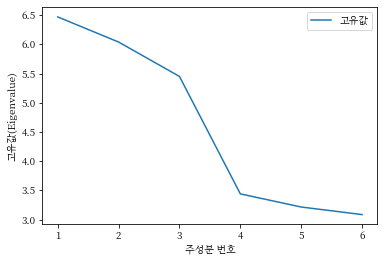

In [50]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"],label="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

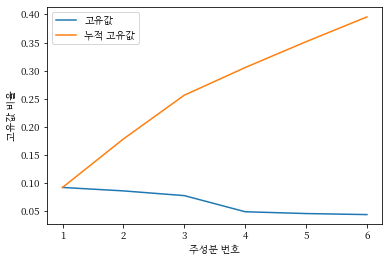

In [51]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"],label="고유값")

plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"],label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [52]:
x_cols = pd.DataFrame({"Feature":df_x_dummy.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                            columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,BLACK_RTD_TEMP_GLASS_START,-0.014,0.321,-0.036,-0.105,0.003,0.090
1,BLACK_RTD_TEMP_GLASS_END,-0.005,0.007,0.010,0.008,0.029,0.101
2,BLACK_RTD_TEMP_WALL_START,-0.004,0.275,-0.064,-0.035,-0.009,0.224
3,BLACK_RTD_TEMP_WALL_MAX,0.002,0.264,-0.040,-0.068,-0.010,0.181
4,BLACK_RTD_PRES_START,0.006,0.001,-0.005,0.044,0.032,0.036
5,BLACK_RTD_PRES_END,-0.009,-0.154,0.018,0.076,-0.003,0.014
6,BLACK_RTD_TEMP_GLASS_OUT,0.029,0.014,-0.001,0.091,-0.085,0.019
7,BLACK_RTD_TEMP_HOOD_START,-0.003,0.203,-0.062,-0.017,-0.033,0.246
8,BLACK_RTD_TEMP_HOOD_MAX,0.001,0.174,-0.048,0.002,-0.050,0.237
9,AG_RTD_TEMP_GLASS_START,-0.018,0.240,-0.036,-0.090,0.042,0.070


In [53]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,-0.0,-0.0,-0.0,0.0,-0.0
Prin2,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0,-0.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0,0.0,0.0
Prin5,0.0,-0.0,-0.0,0.0,1.0,0.0
Prin6,-0.0,-0.0,-0.0,0.0,0.0,1.0


In [54]:
df_raw_x_const = sm.add_constant(df_x_dummy)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     33.64
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:18:58   Log-Likelihood:                -15.803
No. Observations:                3982   AIC:                             173.6
Df Residuals:                    3911   BIC:                             620.2
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [55]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     33.64
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:18:59   Log-Likelihood:                -15.803
No. Observations:                3982   AIC:                             173.6
Df Residuals:                    3911   BIC:                             620.2
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [56]:
x_var = ["Prin1", "Prin2", "Prin3"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     20.49
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           3.56e-13
Time:                        21:18:59   Log-Likelihood:                -923.60
No. Observations:                3982   AIC:                             1855.
Df Residuals:                    3978   BIC:                             1880.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1057      0.005     21.853      0.0

## TAT

In [57]:
# drop: X변수와 변수 삭제
df_raw_x = MFG_TAT.drop(["JUDGE","PANEL_ID","LOT_ID","TIME_1BLACK","TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df_raw_y = MFG_TAT["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [58]:
df_x_dummy.corr().round(3)

,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
TAT_1BLACK_1PRINT,1.000,-0.218,0.385,-0.013,0.196,-0.232,0.023,-0.062,-0.067,-0.035,-0.031,-0.056,-0.028,-0.080,-0.024,-0.032
TAT_1BLACK_2RTD,-0.218,1.000,-0.209,-0.085,-0.055,-0.071,-0.084,0.113,-0.019,0.053,0.061,0.009,-0.055,0.011,-0.066,0.023
TAT_2AG_1PRINT,0.385,-0.209,1.000,0.113,0.190,-0.185,0.136,-0.022,-0.039,-0.008,-0.064,-0.008,-0.072,-0.049,0.055,0.001
TAT_2AG_2RTD,-0.013,-0.085,0.113,1.000,-0.064,0.057,0.026,-0.046,0.025,-0.033,-0.029,0.026,-0.033,0.011,0.003,-0.038
TAT_2AG_3EXPOSURE,0.196,-0.055,0.190,-0.064,1.000,-0.199,-0.047,0.022,-0.007,0.032,0.024,0.021,0.026,-0.014,-0.012,0.010
TAT_3BUS_1DEVELOP,-0.232,-0.071,-0.185,0.057,-0.199,1.000,0.035,-0.070,-0.015,-0.113,-0.101,0.013,0.069,-0.025,0.008,-0.009
TAT_3BUS_2FIRE,0.023,-0.084,0.136,0.026,-0.047,0.035,1.000,-0.043,-0.024,-0.087,-0.138,0.019,-0.079,-0.037,0.270,-0.025
TAT_4DIELEC_FIRE,-0.062,0.113,-0.022,-0.046,0.022,-0.070,-0.043,1.000,0.011,0.090,0.031,0.022,-0.035,-0.003,0.002,-0.007
TAT_5MGO,-0.067,-0.019,-0.039,0.025,-0.007,-0.015,-0.024,0.011,1.000,0.059,0.022,0.042,0.078,0.050,0.009,-0.039
TAT_6PHOS_1R_1DISPENSER,-0.035,0.053,-0.008,-0.033,0.032,-0.113,-0.087,0.090,0.059,1.000,0.068,0.535,0.042,0.724,-0.083,0.017


In [59]:
df_x_dummy.describe().round(3)

,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
count,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000
mean,87.688,219.214,84.534,70.558,161.956,370.947,6971.618,6518.600,533.742,80.129,404.241,80.839,377.429,83.914,7117.407,9977.427
std,4.707,12.987,3.182,2.489,43.270,21.143,257.389,201.875,19.968,10.015,63.320,10.271,30.220,9.415,417.256,163.129
min,74.000,190.000,62.000,63.000,116.000,324.000,6480.000,6393.000,350.000,0.000,297.000,0.000,300.000,0.000,6695.000,9748.000
25%,86.000,210.000,84.000,69.000,140.000,352.000,6807.000,6453.000,530.000,78.000,369.000,78.000,363.000,84.000,6930.000,9750.000
50%,88.000,220.000,84.000,69.000,152.000,372.000,6900.000,6480.000,530.000,80.000,390.000,78.000,396.000,84.000,7080.000,10074.000
75%,88.000,220.000,86.000,72.000,168.000,384.000,7020.000,6540.000,540.000,80.000,429.000,82.000,396.000,86.000,7140.000,10076.000
max,102.000,270.000,100.000,93.000,500.000,420.000,8973.000,8973.000,730.000,100.000,606.000,102.000,408.000,102.000,8996.000,10645.000


In [60]:
x_cols = df_x_dummy.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x_dummy)
print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape Data:\n{}".format(nd_scaled.shape))

Scaled Data:
[[-0.359  0.061 -0.482  1.383 -0.045  2.131 -0.278 -0.355 -0.187 -0.412
  -1.125  0.697  0.615  0.222  0.054  0.592]
 [-0.359 -0.71  -0.168  0.178 -0.276  0.05  -1.083  0.403 -0.187 -0.013
   0.533  0.113  0.118  0.009 -0.387  0.598]
 [-2.058  0.061 -2.054 -0.626 -0.323 -0.139 -0.873  0.388 -0.187 -0.013
   0.249  1.087  0.615  0.222 -0.665  4.093]
 [-0.359 -0.71  -0.168 -0.626  0.371  2.131  0.643 -0.488 -0.187 -0.213
   0.391 -0.276  0.714  0.646 -0.953  0.604]
 [-0.359 -0.71  -0.168 -0.626 -0.692  0.428  2.158 -0.325  0.313 -0.412
  -0.651  0.113  0.515  0.009 -0.018  0.592]]
Shape Data:
(3982, 16)


In [61]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
0,-0.359,0.061,-0.482,1.383,-0.045,2.131,-0.278,-0.355,-0.187,-0.412,-1.125,0.697,0.615,0.222,0.054,0.592
1,-0.359,-0.710,-0.168,0.178,-0.276,0.050,-1.083,0.403,-0.187,-0.013,0.533,0.113,0.118,0.009,-0.387,0.598
2,-2.058,0.061,-2.054,-0.626,-0.323,-0.139,-0.873,0.388,-0.187,-0.013,0.249,1.087,0.615,0.222,-0.665,4.093
3,-0.359,-0.710,-0.168,-0.626,0.371,2.131,0.643,-0.488,-0.187,-0.213,0.391,-0.276,0.714,0.646,-0.953,0.604
4,-0.359,-0.710,-0.168,-0.626,-0.692,0.428,2.158,-0.325,0.313,-0.412,-0.651,0.113,0.515,0.009,-0.018,0.592


In [62]:
df_scaled.describe().round(3)

,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
count,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000,3982.000
mean,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.908,-2.250,-7.082,-3.037,-1.062,-2.221,-1.910,-0.622,-9.203,-8.002,-1.694,-7.872,-2.563,-8.914,-1.012,-1.407
25%,-0.359,-0.710,-0.168,-0.626,-0.507,-0.896,-0.640,-0.325,-0.187,-0.213,-0.557,-0.276,-0.478,0.009,-0.449,-1.394
50%,0.066,0.061,-0.168,-0.626,-0.230,0.050,-0.278,-0.191,-0.187,-0.013,-0.225,-0.276,0.615,0.009,-0.090,0.592
75%,0.066,0.061,0.461,0.580,0.140,0.617,0.188,0.106,0.313,-0.013,0.391,0.113,0.615,0.222,0.054,0.604
max,3.041,3.911,4.861,9.019,7.813,2.320,7.777,12.160,9.830,1.984,3.187,2.061,1.012,1.921,4.503,4.093


In [63]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data:\n {}".format(nd_pca[:5]))
print("Shape:\n {}".format(nd_pca.shape))

PCA Data:
 [[-0.18277081 -1.0384567   1.53401652 -1.14713886  0.71069674 -0.59756414]
 [-0.27687909 -0.4381744  -0.68171823 -0.5776479   0.36365106 -0.34099222]
 [-1.49760437 -2.57379147 -0.86395953  0.14655006 -0.8701198  -2.88495742]
 [-0.10623999 -0.75120655  0.39173734 -1.42495338 -0.13399666 -1.26738236]
 [ 0.39864785 -0.1964221   1.65105042 -0.25752396 -1.01918177 -0.64876194]]
Shape:
 (3982, 6)


In [64]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6",])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-0.358710,0.060533,-0.482179,1.383380,-0.045205,2.131141,-0.278283,-0.354720,-0.187419,-0.412348,-1.125244,0.697344,0.614616,0.221579,0.054153,0.592080,-0.182771,-1.038457,1.534017,-1.147139,0.710697,-0.597564
1,-0.358710,-0.709567,-0.167883,0.177817,-0.276339,0.049798,-1.082613,0.403271,-0.187419,-0.012891,0.533212,0.113078,0.118186,0.009124,-0.386878,0.598211,-0.276879,-0.438174,-0.681718,-0.577648,0.363651,-0.340992
2,-2.058406,0.060533,-2.053662,-0.625892,-0.322565,-0.139415,-0.872788,0.388409,-0.187419,-0.012891,0.248905,1.086855,0.614616,0.221579,-0.664920,4.092815,-1.497604,-2.573791,-0.863960,0.146550,-0.870120,-2.884957
3,-0.358710,-0.709567,-0.167883,-0.625892,0.370835,2.131141,0.642617,-0.488483,-0.187419,-0.212620,0.391058,-0.276434,0.713902,0.646490,-0.952550,0.604342,-0.106240,-0.751207,0.391737,-1.424953,-0.133997,-1.267382
4,-0.358710,-0.709567,-0.167883,-0.625892,-0.692379,0.428224,2.158022,-0.324995,0.313455,-0.412348,-0.651399,0.113078,0.515330,0.009124,-0.017754,0.592080,0.398648,-0.196422,1.651050,-0.257524,-1.019182,-0.648762


In [65]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range (1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.316,0.145,0.145
1,2,1.799,0.112,0.257
2,3,1.503,0.094,0.351
3,4,1.231,0.077,0.428
4,5,1.109,0.069,0.497
5,6,1.054,0.066,0.563


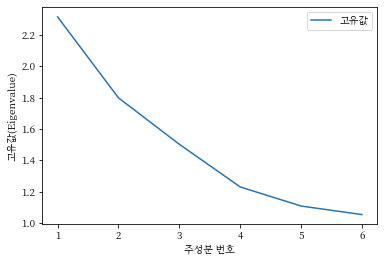

In [66]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"],label="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

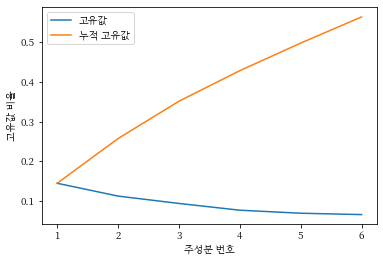

In [67]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"],label="고유값")

plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"],label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [68]:
x_cols = pd.DataFrame({"Feature":df_x_dummy.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,\
                            columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,TAT_1BLACK_1PRINT,-0.122,-0.526,0.150,0.079,-0.087,0.052
1,TAT_1BLACK_2RTD,0.089,0.308,0.199,-0.467,-0.004,-0.051
2,TAT_2AG_1PRINT,-0.100,-0.547,-0.024,0.031,-0.061,-0.036
3,TAT_2AG_2RTD,-0.021,-0.065,-0.215,0.270,-0.381,-0.305
4,TAT_2AG_3EXPOSURE,-0.006,-0.347,0.283,-0.058,0.188,0.019
5,TAT_3BUS_1DEVELOP,-0.036,0.335,-0.352,0.303,-0.118,0.149
6,TAT_3BUS_2FIRE,-0.101,-0.153,-0.476,-0.162,0.304,0.014
7,TAT_4DIELEC_FIRE,0.068,0.056,0.155,-0.420,0.145,-0.318
8,TAT_5MGO,0.077,0.053,0.003,0.217,0.300,-0.586
9,TAT_6PHOS_1R_1DISPENSER,0.567,-0.122,0.006,-0.029,-0.001,-0.003


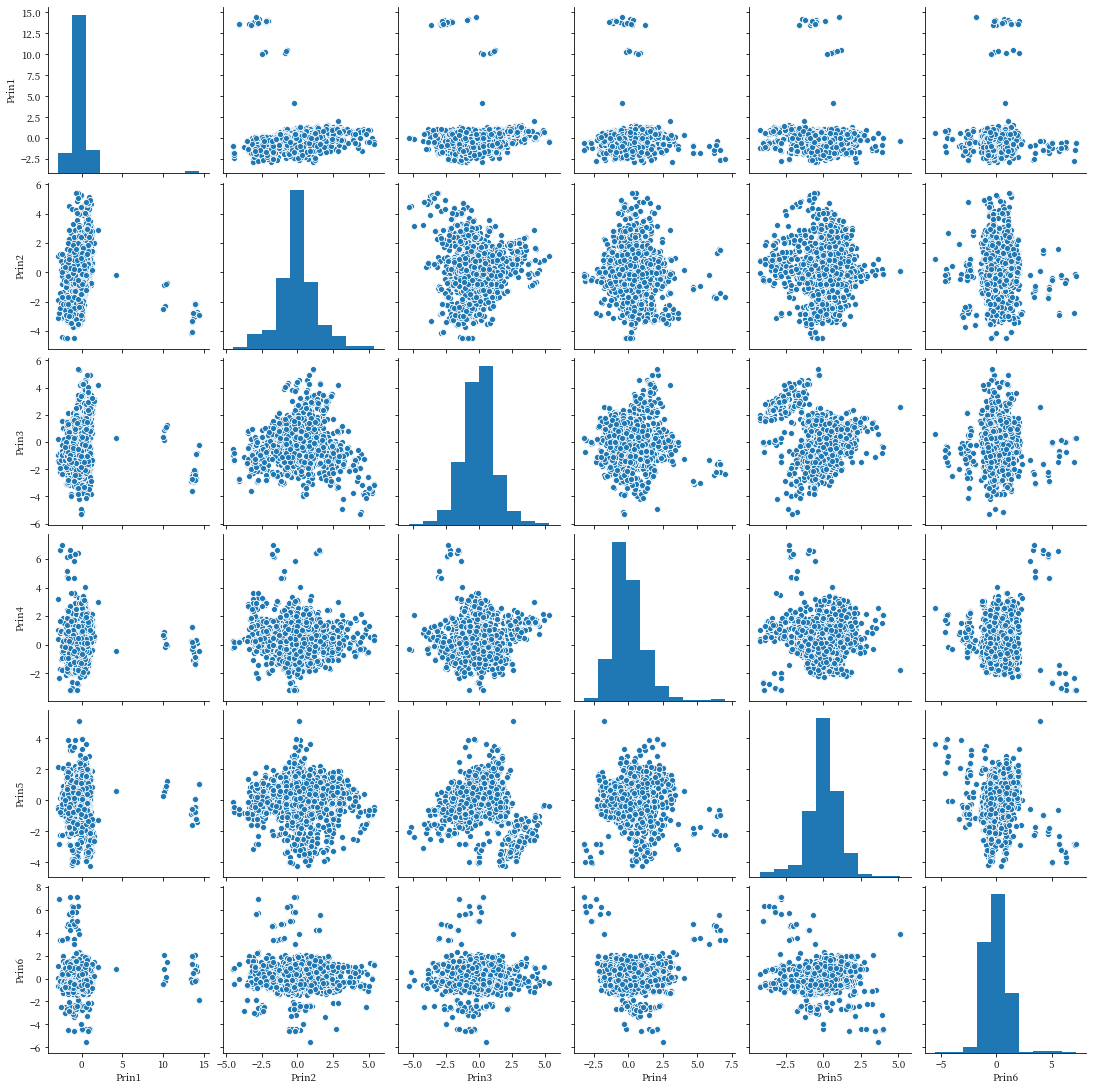

In [69]:
sns.pairplot(df_pca)

In [70]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,-0.0,0.0,0.0,0.0,0.0
Prin2,-0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,0.0,0.0,1.0,-0.0,-0.0,0.0
Prin4,0.0,-0.0,-0.0,1.0,0.0,0.0
Prin5,0.0,-0.0,-0.0,0.0,1.0,-0.0
Prin6,0.0,0.0,0.0,0.0,-0.0,1.0


In [71]:
df_raw_x_const = sm.add_constant(df_x_dummy)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.716
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.48e-18
Time:                        21:24:07   Log-Likelihood:                -893.09
No. Observations:                3982   AIC:                             1820.
Df Residuals:                    3965   BIC:                             1927.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [72]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.716
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           2.48e-18
Time:                        21:24:11   Log-Likelihood:                -893.09
No. Observations:                3982   AIC:                             1820.
Df Residuals:                    3965   BIC:                             1927.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [73]:
x_var = ["Prin1", "Prin2", "Prin3"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.216
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           7.93e-05
Time:                        21:24:15   Log-Likelihood:                -943.34
No. Observations:                3982   AIC:                             1895.
Df Residuals:                    3978   BIC:                             1920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1057      0.005     21.745      0.0